### 一、概念
>关联网络图<br>
>由节点和边构成

#### 1.创建一个图形 

In [10]:
import networkx as nx

%matplotlib inline

In [2]:
G = nx.Graph()
MG = nx.MultiGraph()
D = nx.DiGraph()
MD = nx.MultiDiGraph()

In [4]:
print(type(G))
print(type(MG))
print(type(D))
print(type(MD))

<class 'networkx.classes.graph.Graph'>
<class 'networkx.classes.multigraph.MultiGraph'>
<class 'networkx.classes.digraph.DiGraph'>
<class 'networkx.classes.multidigraph.MultiDiGraph'>


#### 2.节点Nodes

#### 2.1添加节点
>add_node()添加单个点<br>
>add_nodes_from()添加点集合

In [5]:
G.add_node('A')
G.add_node(0)
G.add_node(('a',2))

In [6]:
G.add_nodes_from([1,2,3,4])
G.add_nodes_from(set([10+(3*i)%5 for i in range(10,50)]))

#### 2.2列出Nodes

In [7]:
G.nodes()

NodeView(('A', 0, ('a', 2), 1, 2, 3, 4, 10, 11, 12, 13, 14))

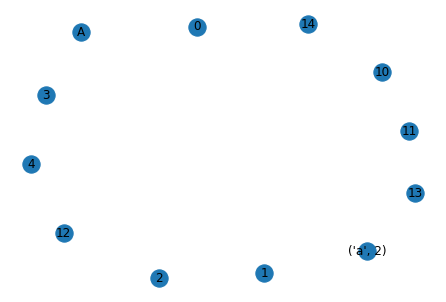

In [20]:
nx.draw(G,with_labels=True)

#### 2.3检查节点是否在图中

In [21]:
13 in G

True

In [22]:
G.has_node(9)

False

In [23]:
G.has_node(13)

True

#### 2.4节点属性

In [24]:
G.add_node('成都',loc='west',pop='1000+')#添加单个节点和属性
G.nodes()

NodeView(('A', 0, ('a', 2), 1, 2, 3, 4, 10, 11, 12, 13, 14, '成都'))

In [33]:
#添加多个节点和属性，一个列表中点多个元组，元组第一个值为节点，第二个值为属性字典，关键字country为所有节点属性
G.add_nodes_from([('苏州',{'loc':'east','pop':'500+'}),
                  ('上海',{'loc':'east','pop':'2000+'}),
                  ('南京',{'loc':'east','pop':'1000+'})],country='中国')
G.nodes()

NodeView(('A', 0, ('a', 2), 1, 2, 3, 4, 10, 11, 12, 13, 14, '成都', '苏州', '上海', '南京'))

In [34]:
G.nodes(data=True)#列出所有节点属性

NodeDataView({'A': {}, 0: {}, ('a', 2): {}, 1: {}, 2: {}, 3: {}, 4: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, '成都': {'loc': 'west', 'pop': '500+'}, '苏州': {'country': '中国', 'loc': 'east', 'pop': '500+'}, '上海': {'country': '中国', 'loc': 'east', 'pop': '2000+'}, '南京': {'country': '中国', 'loc': 'east', 'pop': '1000+'}})

In [41]:
G.node['上海']#列出单个节点属性

{'country': '中国', 'loc': 'east', 'pop': '2000+'}

In [45]:
G.node[4]['loc'] = 'wu'#编辑节点属性
G.nodes(data=True)

NodeDataView({'A': {}, 0: {}, ('a', 2): {}, 1: {}, 2: {}, 3: {}, 4: {'loc': 'wu'}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, '成都': {'loc': 'west', 'pop': '500+'}, '苏州': {'country': '中国', 'loc': 'east', 'pop': '500+'}, '上海': {'country': '中国', 'loc': 'east', 'pop': '2000+'}, '南京': {'country': '中国', 'loc': 'east', 'pop': '1000+'}})

In [46]:
#删除节点属性
del G.node[4]['loc']
G.node[4]

{}

#### 2.5删除节点
>remove_node()添加单个点<br>
>remove_nodes_from()添加点集合

In [53]:
G.remove_node(2)

In [55]:
G.remove_nodes_from(['A',0,('a', 2), 1, 3])

In [48]:
G.remove_nodes_from(set([10+(3*i)%5 for i in range(10,50)]))

In [56]:
G.nodes()

NodeView(('成都', '苏州', '上海', '南京'))

#### 3.edges

#### 3.1添加边
>add_edge()<br>
>add_edges_from()

In [112]:
G.add_edge('上海','苏州')
G.add_edge('宁波','苏州')#宁波在原来节点中不存在，这里会自动创建
G.add_edge('南京','上海')
G.add_edge('成都','上海')

In [113]:
G.add_edges_from([(i,i+2) for i in range(2,11,2)])

#### 3.2列出edge

In [130]:
G.edges()

EdgeView([('成都', '上海'), ('苏州', '上海'), ('苏州', '宁波'), ('上海', '南京'), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12)])

In [131]:
G.edges(data=True)

EdgeDataView([('成都', '上海', {}), ('苏州', '上海', {}), ('苏州', '宁波', {}), ('上海', '南京', {}), (2, 4, {}), (4, 6, {}), (6, 8, {}), (8, 10, {}), (10, 12, {})])

#### 3.3检查edge是否在图中

In [128]:
G.has_edge('上海','苏州')#推荐

True

In [127]:
('上海','苏州') in G.edges()

True

#### 3.4edge属性

In [98]:
G['上海']['南京']['links'] = 8#查看一条边属性

In [116]:
G['上海']#查看关于上海的边及属性

AtlasView({'苏州': {}, '南京': {'links': 8}, '成都': {}})

In [129]:
del G['上海']['南京']['links']#删除edge属性

#### 3.5edge删除

In [134]:
G.remove_edge(2,4)

In [139]:
G.has_edge(2,4)

False

### 二、基本的Graph属性

#### 1.节点和边缘计算
>G.order()方法或者len()函数确定节点数量<br>
>G.size()方法或者len(G.edge())函数确定边数量，推荐size方法

In [155]:
G.order()

11

In [156]:
len(G)

11

In [159]:
G.size()

8

In [160]:
len(G.edges())

8

#### 2.  neighbors相邻节点

In [183]:
type(G.neighbors('上海'))#G.neighbors是一个可迭代对象

dict_keyiterator

In [186]:
for i in G.neighbors('上海'):
    print(i)
G['上海']

苏州
南京
成都


AtlasView({'苏州': {}, '南京': {}, '成都': {}})

#### 3.度degree

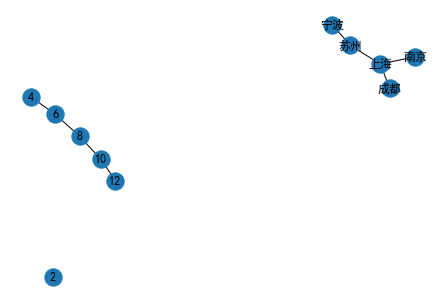

In [172]:
nx.draw(G,with_labels=True,font_family='SimHei')

In [173]:
G.degree()

DegreeView({'成都': 1, '苏州': 2, '上海': 3, '南京': 1, '宁波': 1, 2: 0, 4: 1, 6: 2, 8: 2, 10: 2, 12: 1})

In [178]:
G.degree()['上海']

3